In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
from decimal import Decimal

In [3]:
# Read all csv files from the data folder
data_files = os.listdir("data")

# Dataframes list
dataframes = []

#Loop through files and add each one to a dataframe
for data_file in data_files:
    file_path = os.path.join("data", data_file)
    dataframe = pd.read_csv(file_path)
    dataframes.append(dataframe)

In [4]:
# adjust the time column for each dataframe
for i in range(1, len(dataframes)):
    current_df = dataframes[i]
    
    current_df["time"] += dataframes[i-1]["time"].max() + 0.02

In [9]:
dataframes[1].head()

,time,x-acceleration,y-acceleration,z-acceleration,output
0,60.72,0.577,0.532,0.598,drum
1,60.74,0.587,0.539,0.600,drum
2,60.76,0.590,0.537,0.595,drum
3,60.78,0.589,0.533,0.591,drum
4,60.80,0.584,0.534,0.590,drum


In [7]:
# Add all dataframes together into a single dataframe
df = pd.concat(dataframes, ignore_index = True)

#...and save it to a csv file
df.to_csv("dataset/motion_df.csv")

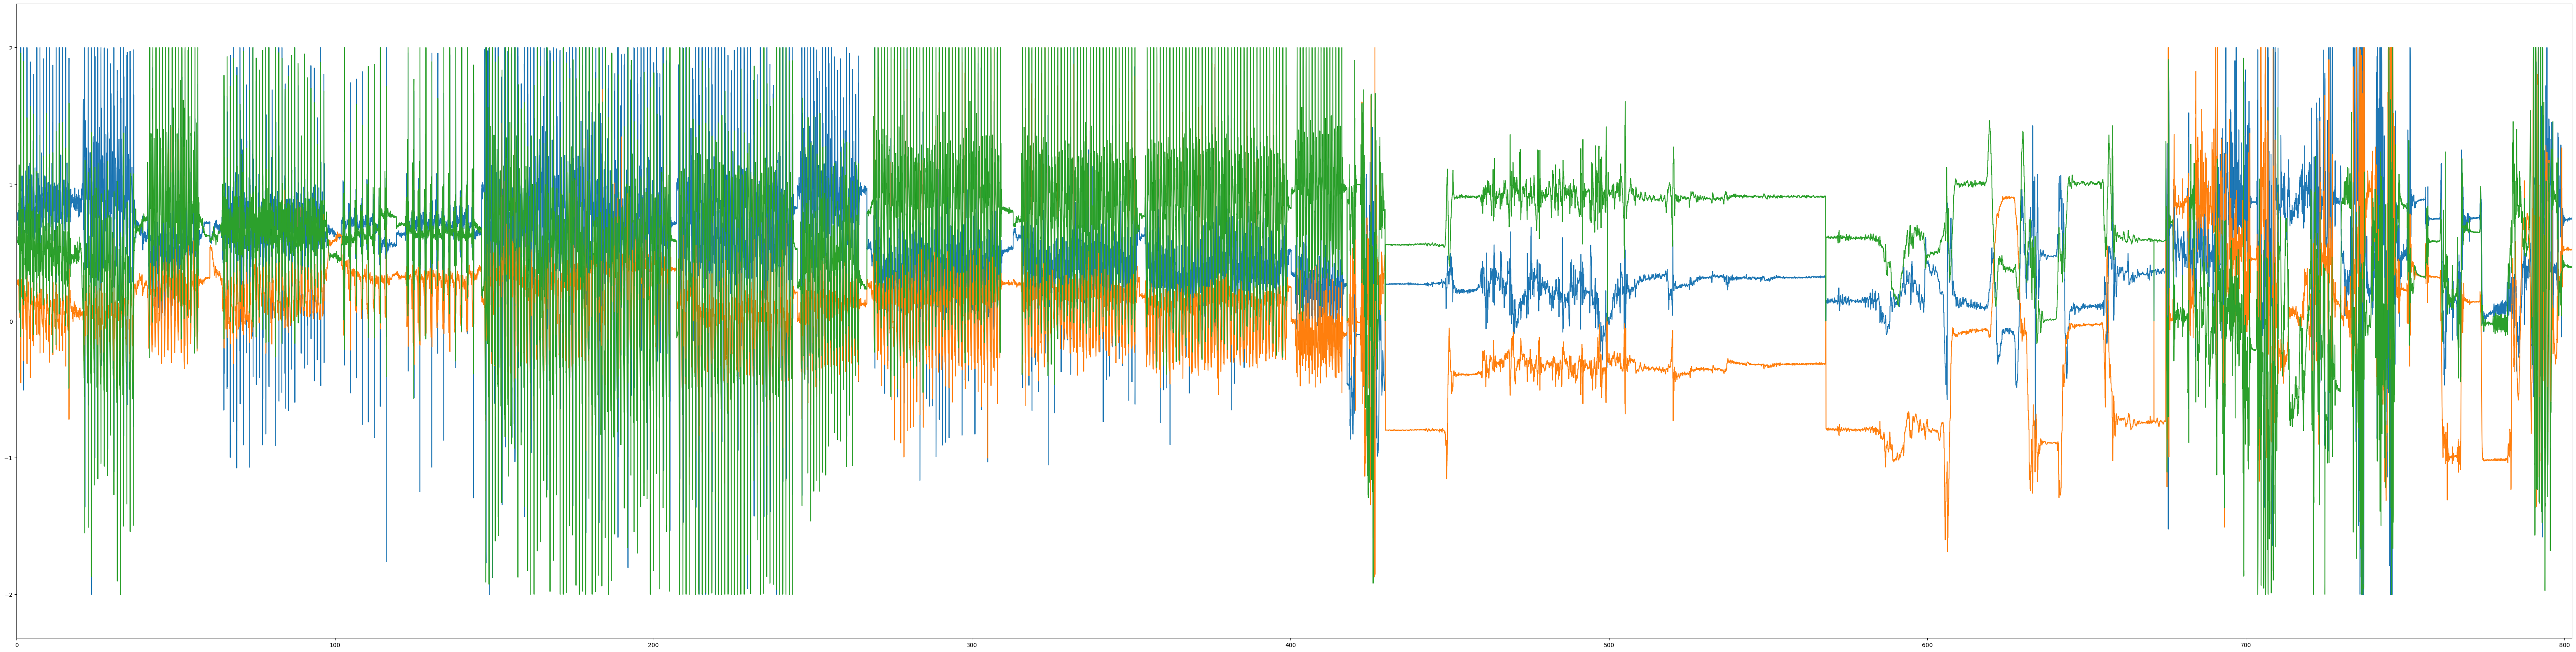

In [11]:
fig = plt.subplots(figsize=(80, 20))


plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0.08

for col in ["x-acceleration", "y-acceleration", "z-acceleration"]:
    plt.plot(df.iloc[:, 0], df[col])
    
